# Homework 2, *part 1* (40 points)

This warm-up problem set is provided to help you get used to PyTorch.

Please, only fill parts marked with "`Your code here`".

In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import torch
assert torch.__version__ >= '1.0.0'

To learn best practices $-$ for example,

* how to choose between `.sqrt()` and `.sqrt_()`,
* when to use `.view()` and how is it different from `.reshape()`,
* which `dtype` to use,

$-$ you are expected to google a lot, read tutorials on the Web and study documentation.

Quick documentation on functions and modules is available with `?` and `help()`, like so:

In [2]:
help(torch.sqrt)

Help on built-in function sqrt:

sqrt(...)
    sqrt(input, out=None) -> Tensor
    
    Returns a new tensor with the square-root of the elements of :attr:`input`.
    
    .. math::
        \text{out}_{i} = \sqrt{\text{input}_{i}}
    
    Args:
        input (Tensor): the input tensor
        out (Tensor, optional): the output tensor
    
    Example::
    
        >>> a = torch.randn(4)
        >>> a
        tensor([-2.0755,  1.0226,  0.0831,  0.4806])
        >>> torch.sqrt(a)
        tensor([    nan,  1.0112,  0.2883,  0.6933])



In [3]:
# to close the Jupyter help bar, press `Esc` or `q`
?torch.cat

## Task 1 (3 points)

Use tensors only: **no lists, loops, numpy arrays etc.**

$\rho(\theta)$ is defined in polar coordinate system:

$$\rho(\theta) = (1 + 0.9 \cdot \cos{8\theta} ) \cdot (1 + 0.1 \cdot \cos{24\theta}) \cdot (0.9 + 0.05 \cdot \cos {200\theta}) \cdot (1 + \sin{\theta})$$

1. Create a regular grid of 1000 values of $\theta$ between $-\pi$ and $\pi$.
2. Compute $\rho(\theta)$ at these values.
3. Convert it into Cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)).

In [4]:
theta = torch.linspace(-math.pi, math.pi, steps=1000)# (1) Your code here
assert theta.shape == (1000,)

rho = (1. + .9 * torch.cos(8 * theta)) * (1. + .1 * torch.cos(24 * theta)) * (.9 + .05 * torch.cos(200 * theta)) * (1. + torch.sin(theta)) # (2) Your code here
assert torch.is_same_size(rho, theta)

# (3) Your code here
x = rho * theta.cos()
y = rho * theta.sin()

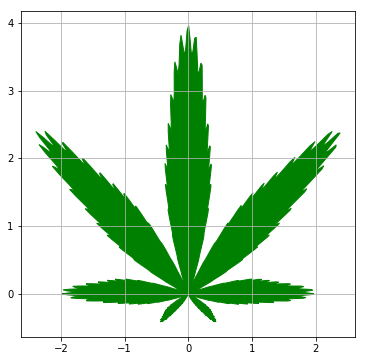

In [5]:
# Run this cell and make sure the plot is correct
plt.figure(figsize=[6,6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

## Task 2 (7 points)

Use tensors only: **no lists, loops, numpy arrays etc.**

We will implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway's_Game_of_Life) in PyTorch.

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)

If you skipped the URL above, here are the rules:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* At one step in time, the generation update happens:
  * Any living cell that has 2 or 3 neighbors survives, otherwise (0,1 or 4+ neighbors) it dies
  * Any cell with exactly 3 neighbors becomes alive if it was dead

You are given a reference numpy implementation of the update step. Your task is to convert it to PyTorch.

In [6]:
from scipy.signal import correlate2d as conv2d

def numpy_update(alive_map):
    # Count neighbours with convolution
    conv_kernel = np.array([[1,1,1],
                            [1,0,1],
                            [1,1,1]])
    
    num_alive_neighbors = conv2d(alive_map, conv_kernel, mode='same')
    
    # Apply game rules
    born = np.logical_and(num_alive_neighbors == 3, alive_map == 0)
    survived = np.logical_and(np.isin(num_alive_neighbors, [2,3]), alive_map == 1)
    
    np.copyto(alive_map, np.logical_or(born, survived))

In [7]:
def torch_update(alive_map):
    """
    Game of Life update function that does to `alive_map` exactly the same as `numpy_update`.
    
    :param alive_map: `torch.tensor` of shape `(height, width)` and dtype `torch.float32`
        containing 0s (dead) an 1s (alive)
    """
    # Your code here
    conv_kernel = torch.ones(1, 1, 3, 3)
    conv_kernel[0,0,1,1] = 0
    
    num_alive_neighbors = torch.conv2d(alive_map[None, None, ...], conv_kernel, padding=1)[0,0]
    
    # Apply game rules
    born = (num_alive_neighbors == 3) & (alive_map == 0)
    survived = ((num_alive_neighbors == 2) | (num_alive_neighbors == 3)) & (alive_map == 1)
    
#     alive_map.data = (born | survived).float()
    alive_map.copy_(born | survived)

In [8]:
# Generate a random initial map
alive_map_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
alive_map_torch = torch.tensor(alive_map_numpy).float().clone()

numpy_update(alive_map_numpy)
torch_update(alive_map_torch)

# results should be identical
assert np.allclose(alive_map_torch.numpy(), alive_map_numpy), \
    "Your PyTorch implementation doesn't match numpy_update."
print("Well done!")

Well done!


<IPython.core.display.Javascript object>


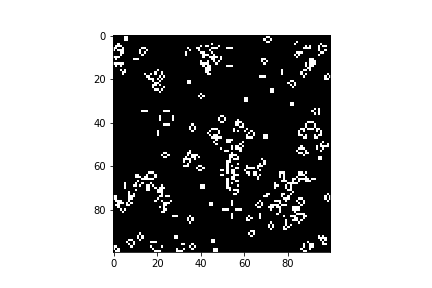

<IPython.core.display.Javascript object>


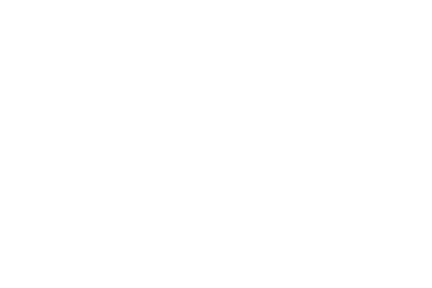

In [9]:
%matplotlib notebook
plt.ion()

# initialize game field
alive_map = np.random.choice([0, 1], size=(100, 100))
alive_map = torch.tensor(alive_map).float()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    torch_update(alive_map)
    
    # re-draw image
    ax.clear()
    ax.imshow(alive_map.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


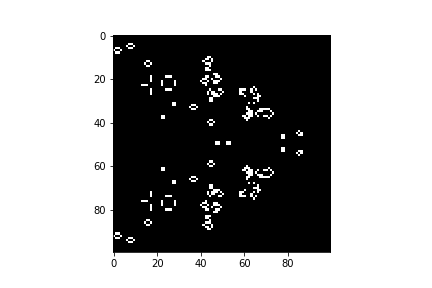

<IPython.core.display.Javascript object>


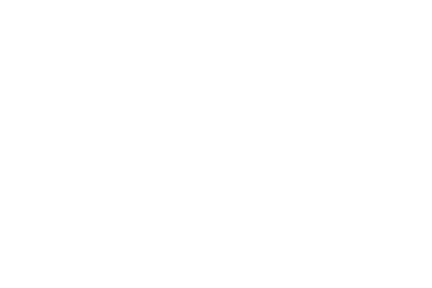

In [10]:
# A fun setup for your amusement
alive_map = np.arange(100) % 2 + np.zeros([100, 100])
alive_map[48:52, 50] = 1

alive_map = torch.tensor(alive_map).float()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(150):
    torch_update(alive_map)
    ax.clear()
    ax.imshow(alive_map.numpy(), cmap='gray')
    fig.canvas.draw()

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE)

## Task 3 (30 points)

You have to solve yet another character recognition problem: 10 letters, ~14 000 train samples.

For this, we ask you to build a multilayer perceptron (*i.e. a neural network of linear layers*) from scratch using **low-level** PyTorch interface.

Requirements:
1. at least 82% accuracy
2. at least 2 linear layers
3. use [softmax followed by categorical cross-entropy](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

**You are NOT allowed to use**
* numpy arrays
* `torch.nn`, `torch.optim`
* convolutions

Tips:

* Pick random batches (either shuffle data before each epoch or sample each batch randomly).
* Do not initialize weights with zeros ([learn why](https://stats.stackexchange.com/questions/27112/danger-of-setting-all-initial-weights-to-zero-in-backpropagation)). Gaussian noise with small variance will do.
* 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
* To improve accuracy, consider changing layers' sizes, nonlinearities, optimization methods, weights initialization.
* Don't use GPU yet.

**Reproducibility requirement**: you have to format your code cells so that `Cell -> Run All` on a fresh notebook **reliably** trains your model to the desired accuracy in a couple of minutes and reports the accuracy reached.

Happy googling!

In [11]:
np.random.seed(666)
torch.manual_seed(666)

from notmnist import load_notmnist
letters = 'ABCDEFGHIJ' 
X_train, y_train, X_test, y_test = map(torch.tensor, load_notmnist(letters=letters))
X_train.squeeze_()
X_test.squeeze_();

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]


<IPython.core.display.Javascript object>


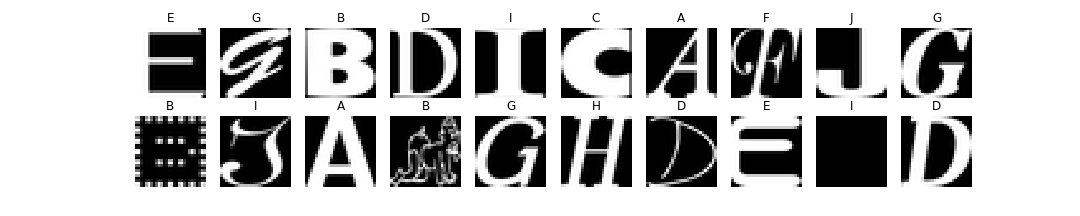

In [12]:
%matplotlib notebook
fig, axarr = plt.subplots(2, 10, figsize=(15,3))

for idx, ax in enumerate(axarr.ravel()):
    ax.imshow(X_train[idx].numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title(letters[y_train[idx]])

The cell below has an example layout for encapsulating your neural network. Feel free to modify the interface if you need to (add arguments, add return values, add methods etc.). For example, you may want to add a method `do_gradient_step()` that executes one optimization algorithm (SGD / Adadelta / Adam / ...) step.

In [13]:
class NeuralNet:
    def __init__(self, n_in=28*28, n_hidden=[100, 200, 50], n_out=10):
        # Your code here
        
        self.train = True
        
        self.layers = []
        
        # A list to loop over.
        n_layer = n_hidden.copy()
        n_layer.insert(0, n_in)
        n_layer.append(n_out)
        
        for i in range(1, len(n_layer)):
            layer = {}
            # Xavier initialization
            layer['W'] = torch.randn(n_layer[i-1], n_layer[i]) * math.sqrt(1. / n_layer[i-1])
            layer['W'].requires_grad_(True)
            layer['b'] = torch.zeros(n_layer[i], requires_grad=True)
            self.layers.append(layer)
        
    def predict(self, images):
        """
        images: `torch.tensor` of shape `batch_size x height x width`
            and dtype `torch.float32`.
        
        returns: `output`, a `torch.tensor` of shape `batch_size x 10`,
            where `output[i][j]` is the probability of `i`-th
            batch sample to belong to `j`-th class.
        """
        # Your code here
        
        self.x = images.reshape(images.shape[0], -1)
        
        for i, layer in enumerate(self.layers):
            # Dense layer
            self.x = self.x @ layer['W'] + layer['b']
            # Skip nonlineriarity on the last step
            if i == len(self.layers) - 1:
                break
            # ReLU
            self.x = torch.max(self.x, torch.zeros_like(self.x))
        
        # Softmax
        self.x = self.x - self.x.max(dim=1, keepdim=True).values # for numerical stability
        self.x = self.x.exp()
        self.x = self.x / self.x.sum(dim=1, keepdim=True)
        
        return self.x

    # Your code here
    def criterion(self, target):
        n = target.shape[0]
        self.loss = -torch.log(self.x[torch.arange(n), target.type(torch.long)] + 1e-10).sum()
        return self.loss

    def backward(self):
        self.loss.backward()
        
    def step(self, lr=1e-4):
        for layer in self.layers:
            for param_name in layer:
                param = layer[param_name]
                param.data -= lr * param.grad
                
    
    def adam(self, lr=1e-3, beta1=.9, beta2=.999, eps=1e-8):
        state = {}
        state.setdefault('m', {})
        state.setdefault('v', {})
        state.setdefault('t', 0)
        state['t'] += 1

        var_index = 0
        lr_t = lr * math.sqrt(1 - beta2 ** state['t']) / (1 - beta1 ** state['t'])
        for layer in self.layers:
            for param_name in layer:
                current_var = layer[param_name]
                current_grad = current_var.grad

                var_first_moment = state['m'].setdefault(var_index, torch.zeros_like(current_grad))
                var_second_moment = state['v'].setdefault(var_index, torch.zeros_like(current_grad))

                var_first_moment = beta1 * var_first_moment + (1. - beta1) * current_grad
                var_second_moment = beta2 * var_second_moment + (1. - beta2) * current_grad ** 2
                current_var.data -= lr_t * var_first_moment / (var_second_moment ** .5 + eps)
                
                var_index = var_index + 1
    
            
    def zero_grad(self):
        for layer in self.layers:
            for param_name in layer:
                param = layer[param_name]
                if param.grad is not None:
                    param.grad.detach_()
                    param.grad.zero_()
                    
    def train_iteration(self, X, y, lr=1e-3):
        self.zero_grad()
        y_pred = self.predict(X)
        self.criterion(y)
        self.backward()
#         self.step(lr=lr)
        self.adam(lr=lr)

In [14]:
def accuracy(model, images, labels):
    """
    model: `NeuralNet`
    images: `torch.tensor` of shape `N x height x width`
        and dtype `torch.float32`
    labels: `torch.tensor` of shape `N` and dtype `torch.int64`. Contains
        class index for each sample
    
    returns:
        fraction of samples from `images` correctly classified by `model`
    """
    # Your code here
    y_pred = model.predict(images).argmax(dim=1)
    n_predicted = float((y_pred == labels).sum())
    return n_predicted / labels.shape[0]

In [15]:
model = NeuralNet()

# Your code here (train the model)
batch_size = 64
epochs = 15

n_batches = int(y_train.shape[0] / batch_size)

lr = 1e-3
for epoch in range(epochs):
    # shuffle the indices
    train_indices = torch.randperm(y_train.shape[0])
    
    # for simplicity, use only full-size batches
    train_indices = train_indices[:n_batches*batch_size]

    train_loss = 0.0
    for i in range(n_batches):
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        
        model.train_iteration(X_batch, y_batch, lr)
        train_loss += model.loss / n_batches
    
    # schedule learning rate
    if epoch % 3 == 0:
        lr /= 5
    
    print("Epoch \t #%d \t train loss \t %.4f" % (epoch, train_loss))

Epoch 	 #0 	 train loss 	 32.1635
Epoch 	 #1 	 train loss 	 17.0966
Epoch 	 #2 	 train loss 	 15.2355
Epoch 	 #3 	 train loss 	 13.9226
Epoch 	 #4 	 train loss 	 12.2343
Epoch 	 #5 	 train loss 	 11.8983
Epoch 	 #6 	 train loss 	 11.6500
Epoch 	 #7 	 train loss 	 11.3114
Epoch 	 #8 	 train loss 	 11.2244
Epoch 	 #9 	 train loss 	 11.1695
Epoch 	 #10 	 train loss 	 11.0856
Epoch 	 #11 	 train loss 	 11.0739
Epoch 	 #12 	 train loss 	 11.0632
Epoch 	 #13 	 train loss 	 11.0447
Epoch 	 #14 	 train loss 	 11.0426


In [16]:
train_acc = accuracy(model, X_train, y_train) * 100
test_acc = accuracy(model, X_test, y_test) * 100
print("Train accuracy: %.2f, test accuracy: %.2f" % (train_acc, test_acc))

assert test_acc >= 82.0, "You have to do better"

Train accuracy: 94.97, test accuracy: 90.39
